# Data mining and Machine Learning Portfolio, F20DL 

In [2]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [4]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn import metrics

In [5]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

With this code, we download and store the tgz file and extract it on the same location of the notebook and sub folders "datasets/housing/"

In [6]:
data = pd.read_csv("US_Accidents_Dec21_updated.csv")

In [7]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [12]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

All attributes are numerical, except the ocean_proximity field.

In [13]:
#This method shows a statistical summary of the numerical attributes 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,2845342.0,2.137572,0.478722,1.000000,2.000000,2.000000,2.000000,4.000000e+00
Start_Lat,2845342.0,36.245201,5.363797,24.566027,33.445174,36.098609,40.160243,4.900058e+01
Start_Lng,2845342.0,-97.114633,18.317819,-124.548074,-118.033113,-92.418076,-80.372431,-6.711317e+01
End_Lat,2845342.0,36.245321,5.363873,24.566013,33.446278,36.097987,40.161049,4.907500e+01
End_Lng,2845342.0,-97.114387,18.317632,-124.545748,-118.033331,-92.417718,-80.373383,-6.710924e+01
Distance(mi),2845342.0,0.702678,1.560361,0.000000,0.052000,0.244000,0.764000,1.551860e+02
Number,1101431.0,8089.408114,18360.093995,0.000000,1270.000000,4007.000000,9567.000000,9.999997e+06
Temperature(F),2776068.0,61.793556,18.622629,-89.000000,50.000000,64.000000,76.000000,1.960000e+02
Wind_Chill(F),2375699.0,59.658231,21.160967,-89.000000,46.000000,63.000000,76.000000,1.960000e+02
Humidity(%),2772250.0,64.365452,22.874568,1.000000,48.000000,67.000000,83.000000,1.000000e+02


In [14]:
data.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

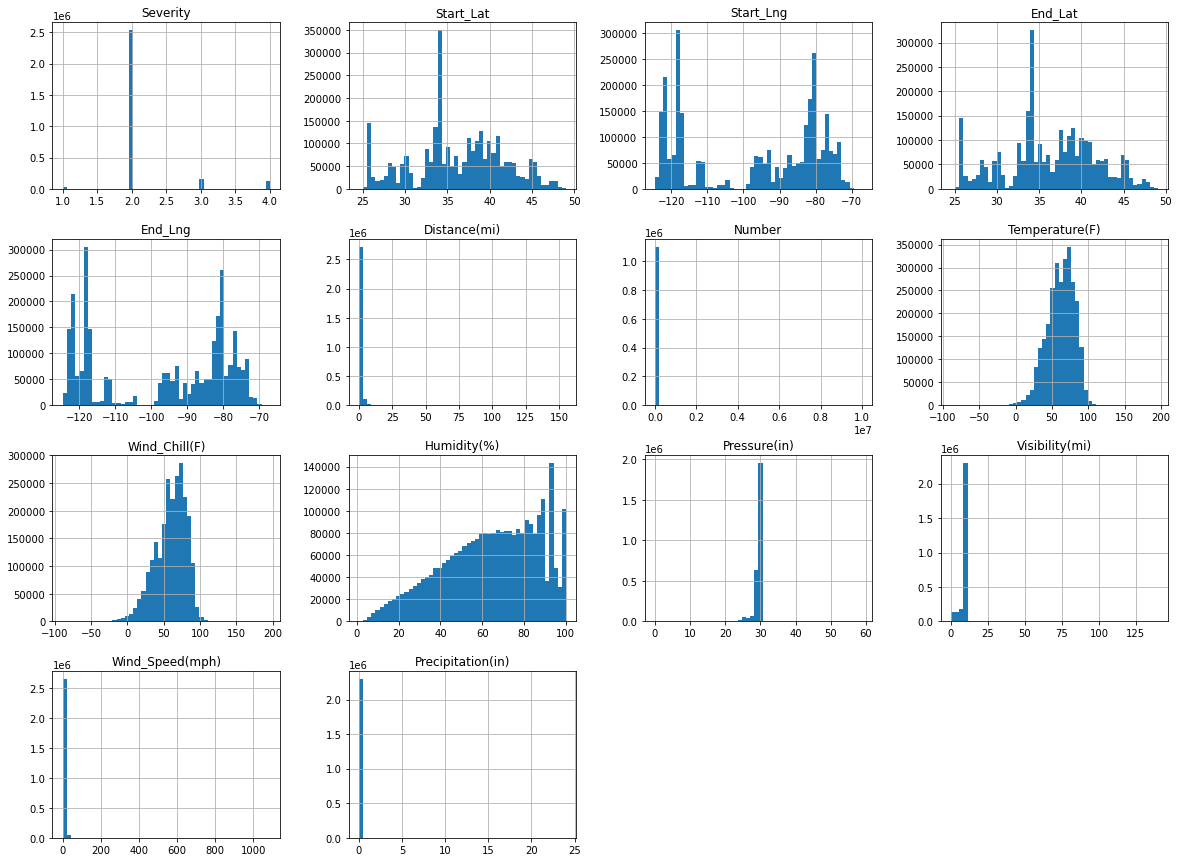

In [15]:
#To plot a histogram for each numerical attribute
data.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
cities = data.City.unique()
len(cities)

11682

In [17]:
Weatherconditions = data.Weather_Condition.value_counts().reset_index()
Weatherconditions.columns = ['Weather_Condition','Accidents']
Weatherconditions['Percentage'] = round(Weatherconditions['Accidents'] * 100 /Weatherconditions['Accidents'].sum() , 2)
Weatherconditions.head(10)

,Weather_Condition,Accidents,Percentage
0,Fair,1107194,39.90
1,Mostly Cloudy,363959,13.12
2,Cloudy,348767,12.57
3,Partly Cloudy,249939,9.01
4,Clear,173823,6.26
5,Light Rain,128403,4.63
6,Overcast,84882,3.06
7,Scattered Clouds,45132,1.63
8,Light Snow,43752,1.58
9,Fog,41226,1.49


In [18]:
Severitycounts = data.Severity.value_counts().reset_index()
Severitycounts.columns = ['Severity','Accidents']
Severitycounts['Percentage'] = round(Severitycounts['Accidents'] * 100 /Severitycounts['Accidents'].sum() , 2)
Severitycounts.head()

,Severity,Accidents,Percentage
0,2,2532991,89.02
1,3,155105,5.45
2,4,131193,4.61
3,1,26053,0.92


In [19]:
table = data

# Correlations and Visualizations


In [20]:
corr_matrix = data.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes
corr_matrix["Distance(mi)"].sort_values(ascending=False)

Distance(mi)         1.000000
Severity             0.092140
End_Lat              0.071593
Start_Lat            0.071588
Number               0.067331
Start_Lng            0.039861
End_Lng              0.039830
Humidity(%)          0.026860
Junction             0.022442
Wind_Speed(mph)      0.011127
Precipitation(in)    0.003050
Roundabout          -0.002491
Bump                -0.005408
Give_Way            -0.006655
Traffic_Calming     -0.007322
No_Exit             -0.010184
Railway             -0.021462
Stop                -0.027108
Amenity             -0.032717
Visibility(mi)      -0.034001
Temperature(F)      -0.051212
Station             -0.052826
Wind_Chill(F)       -0.060094
Pressure(in)        -0.069115
Crossing            -0.091256
Traffic_Signal      -0.105722
Turning_Loop              NaN
Name: Distance(mi), dtype: float64

In [21]:
numOfAccidentsPerCity = data.City.value_counts()
numOfAccidentsPerCity.head(20)

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

<AxesSubplot:>

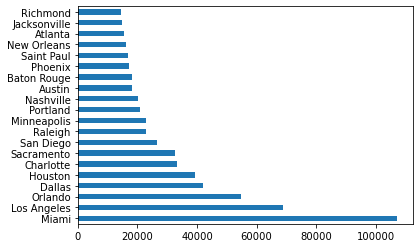

In [22]:
numOfAccidentsPerCity[:20].plot(kind = 'barh')

<AxesSubplot:>

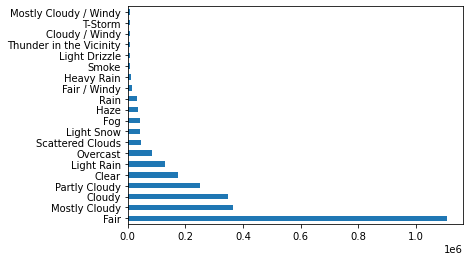

In [23]:
Weathertypes = data.Weather_Condition.value_counts()
Weathertypes[:20].plot(kind = 'barh')

In [24]:
corr_matrix["Severity"].sort_values(ascending=False)
# Most correlated attributes to Severity

Severity             1.000000
End_Lng              0.114064
Start_Lng            0.114063
Distance(mi)         0.092140
End_Lat              0.089209
Start_Lat            0.089207
Wind_Speed(mph)      0.048382
Junction             0.045928
Pressure(in)         0.043883
Humidity(%)          0.037802
Precipitation(in)    0.013845
Give_Way             0.008141
Visibility(mi)       0.007371
Number              -0.000689
Roundabout          -0.000773
Railway             -0.001747
No_Exit             -0.002359
Stop                -0.002536
Traffic_Calming     -0.003009
Bump                -0.003739
Amenity             -0.003940
Traffic_Signal      -0.012798
Station             -0.018017
Crossing            -0.035382
Temperature(F)      -0.045335
Wind_Chill(F)       -0.097459
Turning_Loop              NaN
Name: Severity, dtype: float64

array([[<AxesSubplot:xlabel='Severity', ylabel='Severity'>,
        <AxesSubplot:xlabel='Distance(mi)', ylabel='Severity'>,
        <AxesSubplot:xlabel='Wind_Chill(F)', ylabel='Severity'>],
       [<AxesSubplot:xlabel='Severity', ylabel='Distance(mi)'>,
        <AxesSubplot:xlabel='Distance(mi)', ylabel='Distance(mi)'>,
        <AxesSubplot:xlabel='Wind_Chill(F)', ylabel='Distance(mi)'>],
       [<AxesSubplot:xlabel='Severity', ylabel='Wind_Chill(F)'>,
        <AxesSubplot:xlabel='Distance(mi)', ylabel='Wind_Chill(F)'>,
        <AxesSubplot:xlabel='Wind_Chill(F)', ylabel='Wind_Chill(F)'>]],
      dtype=object)

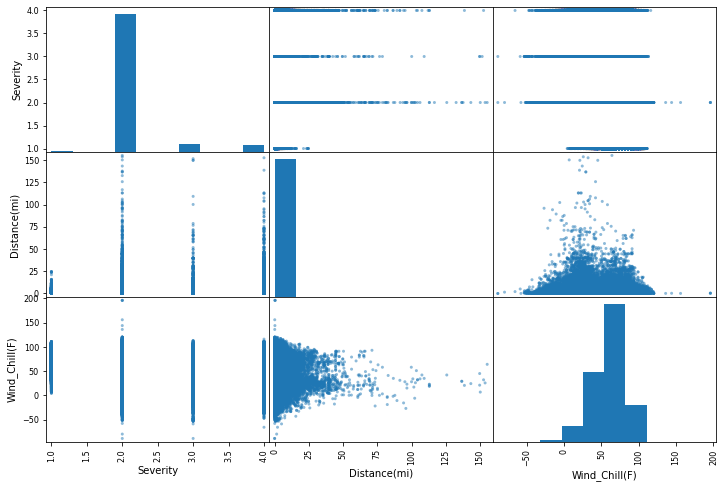

In [25]:
from pandas.plotting import scatter_matrix

attributes = ["Severity","Distance(mi)","Wind_Chill(F)"]
scatter_matrix(data[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other


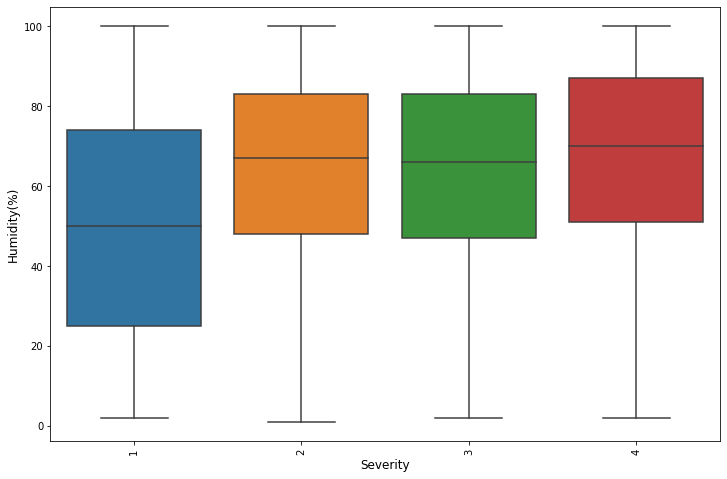

In [26]:
#Boxplot to correlate Humidity and Severity
plt.figure(figsize=(12,8))
sns.boxplot(x="Severity", y="Humidity(%)", data=data)
plt.ylabel('Humidity(%)', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

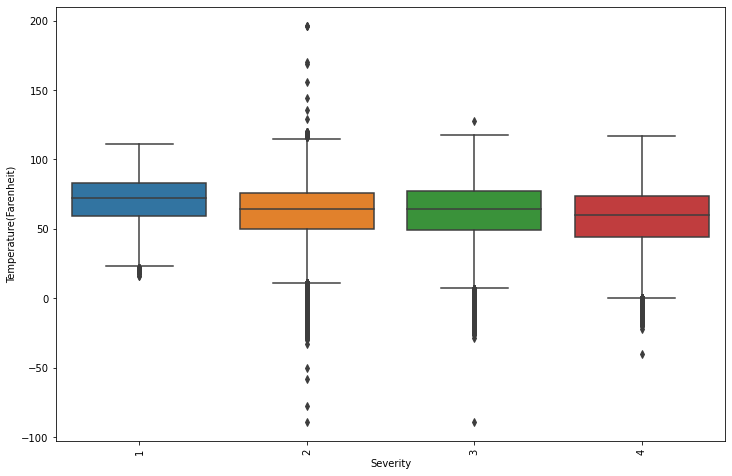

In [27]:
#Boxplot to correlate Temp and Severity
plt.figure(figsize=(12,8))
sns.boxplot(x="Severity", y="Temperature(F)", data=data)
plt.ylabel('Temperature(Farenheit)', fontsize=10)
plt.xlabel('Severity', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

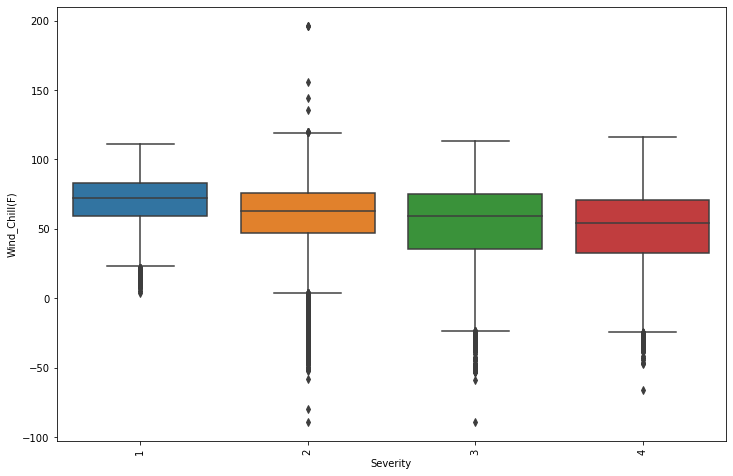

In [28]:
#Boxplot to correlate WindChill and Severity
plt.figure(figsize=(12,8))
sns.boxplot(x="Severity", y="Wind_Chill(F)", data=data)
plt.ylabel('Wind_Chill(F)', fontsize=10)
plt.xlabel('Severity', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

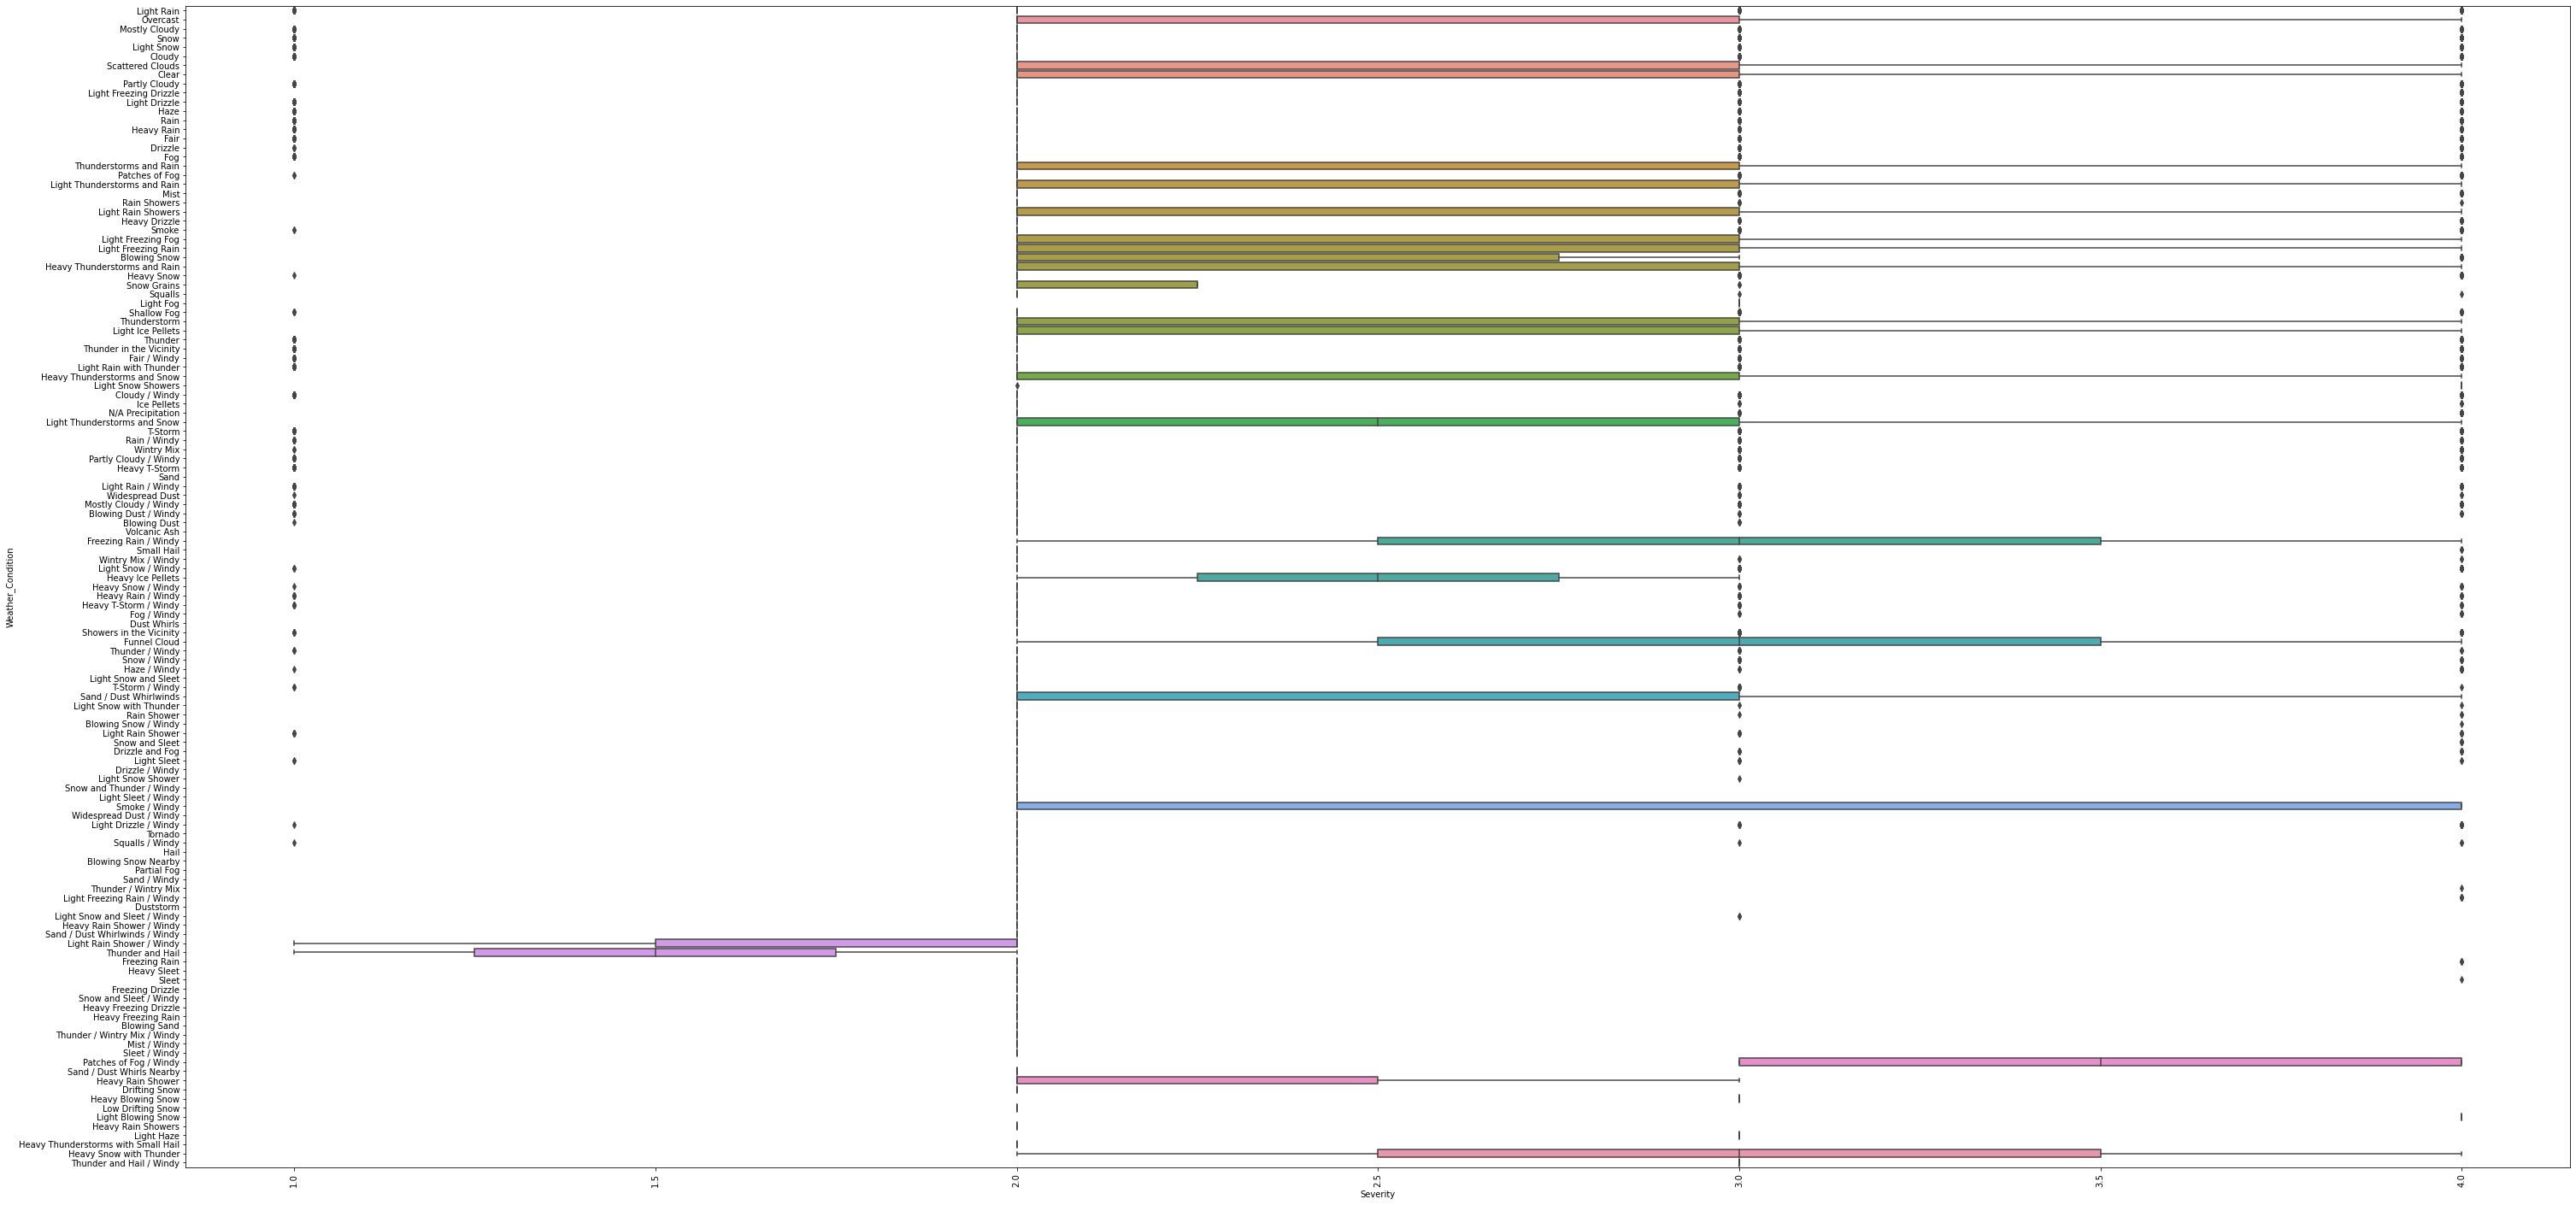

In [29]:
#Boxplot to correlate WeatherCondition and Severity
plt.figure(figsize=(50,25))
sns.boxplot(x="Severity", y="Weather_Condition", data=data)
plt.ylabel('Weather_Condition', fontsize=10)
plt.xlabel('Severity', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

# Analyzing most correlating features (Lab3, week4)

In [30]:
testData1 = data.copy()
testData2 = data.copy()
testData3 = data.copy()
testData4 = data.copy()

print("After changing 2,3,4 to 99")

testData1['Severity'] = testData1['Severity'].replace([2],0)
testData1['Severity'] = testData1['Severity'].replace([3],0)
testData1['Severity'] = testData1['Severity'].replace([4],0)

testData2['Severity'] = testData2['Severity'].replace([1],0)
testData2['Severity'] = testData2['Severity'].replace([3],0)
testData2['Severity'] = testData2['Severity'].replace([4],0)

testData3['Severity'] = testData3['Severity'].replace([1],0)
testData3['Severity'] = testData3['Severity'].replace([4],0)
testData3['Severity'] = testData3['Severity'].replace([2],0)

testData4['Severity'] = testData4['Severity'].replace([1],0)
testData4['Severity'] = testData4['Severity'].replace([3],0)
testData4['Severity'] = testData4['Severity'].replace([2],0)


print(testData3["Severity"].value_counts())


After changing 2,3,4 to 99
0    2690237
3     155105
Name: Severity, dtype: int64


In [31]:
#Looking for Correlations for different classes of Severity (e.g testData1 for Severity = 1 and so on)
corr_matrix_data1 = testData1.corr()
corr_matrix_data1["Severity"].sort_values(ascending=False)

Severity             1.000000
Traffic_Signal       0.120816
Crossing             0.098200
Wind_Chill(F)        0.055563
Temperature(F)       0.049163
Wind_Speed(mph)      0.017663
Visibility(mi)       0.015361
Railway              0.013699
No_Exit              0.012042
Amenity              0.010831
Station              0.009867
Give_Way             0.006776
Stop                 0.002168
Traffic_Calming      0.001704
Bump                 0.000517
Roundabout           0.000490
Precipitation(in)   -0.001735
Junction            -0.004765
End_Lat             -0.009715
Start_Lat           -0.009717
Number              -0.015495
Start_Lng           -0.021186
End_Lng             -0.021187
Distance(mi)        -0.030796
Pressure(in)        -0.042321
Humidity(%)         -0.060888
Turning_Loop              NaN
Name: Severity, dtype: float64

In [32]:
corr_matrix_data2 = testData2.corr()
corr_matrix_data2["Severity"].sort_values(ascending=False)

Severity             1.000000
Wind_Chill(F)        0.057926
Station              0.013222
Temperature(F)       0.011472
Number               0.009230
Stop                 0.007029
Bump                 0.003507
Traffic_Calming      0.002106
Roundabout           0.000770
Amenity              0.000508
Humidity(%)         -0.000087
No_Exit             -0.003870
Railway             -0.005906
Crossing            -0.010319
Give_Way            -0.010517
Precipitation(in)   -0.016908
Visibility(mi)      -0.020936
Pressure(in)        -0.022967
Traffic_Signal      -0.049457
Distance(mi)        -0.051789
Junction            -0.061190
Wind_Speed(mph)     -0.069599
Start_Lat           -0.082253
End_Lat             -0.082255
Start_Lng           -0.096864
End_Lng             -0.096864
Turning_Loop              NaN
Name: Severity, dtype: float64

In [33]:
corr_matrix_data3 = testData3.corr()
corr_matrix_data3["Severity"].sort_values(ascending=False)

Severity             1.000000
Junction             0.077665
Wind_Speed(mph)      0.067089
Start_Lng            0.052905
End_Lng              0.052904
End_Lat              0.050645
Start_Lat            0.050644
Pressure(in)         0.024320
Visibility(mi)       0.022633
Precipitation(in)    0.021727
Traffic_Signal       0.011123
Give_Way             0.003269
Railway              0.002707
Temperature(F)       0.001644
No_Exit              0.000476
Roundabout          -0.001108
Number              -0.001293
Traffic_Calming     -0.001599
Humidity(%)         -0.002263
Bump                -0.002424
Amenity             -0.006726
Station             -0.010841
Distance(mi)        -0.012905
Stop                -0.016740
Crossing            -0.020573
Wind_Chill(F)       -0.045307
Turning_Loop              NaN
Name: Severity, dtype: float64

In [34]:
corr_matrix_data4 = testData4.corr()
corr_matrix_data4["Severity"].sort_values(ascending=False)

Severity             1.000000
Distance(mi)         0.105154
End_Lng              0.096740
Start_Lng            0.096739
End_Lat              0.072199
Start_Lat            0.072197
Humidity(%)          0.030482
Pressure(in)         0.027250
Wind_Speed(mph)      0.023178
Junction             0.009301
Give_Way             0.009061
Traffic_Signal       0.006809
Stop                 0.006659
Precipitation(in)    0.004258
Amenity              0.001604
Roundabout          -0.000171
No_Exit             -0.000215
Visibility(mi)      -0.000347
Railway             -0.000348
Traffic_Calming     -0.002183
Bump                -0.002838
Number              -0.003758
Crossing            -0.006948
Station             -0.012455
Temperature(F)      -0.041443
Wind_Chill(F)       -0.073010
Turning_Loop              NaN
Name: Severity, dtype: float64

In [35]:
#Use top 2 features for each of the Classes (5 total features) drop the rest
#1-WindChill, Humidity
#2-WindChill, WindSpeed
#3-WindChill, WindSpeed
#4-Distance, Temperature
df1 = data.filter(['Severity', 'Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)'])
df1

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi)
0,3,36.1,42.1,58.0,10.4,3.230
1,2,NaN,36.9,91.0,NaN,0.747
2,2,NaN,36.0,97.0,NaN,0.055
3,2,NaN,39.0,55.0,NaN,0.123
4,3,29.8,37.0,93.0,10.4,0.500
...,...,...,...,...,...,...
2845337,2,86.0,86.0,40.0,13.0,0.543
2845338,2,70.0,70.0,73.0,6.0,0.338
2845339,2,73.0,73.0,64.0,10.0,0.561
2845340,2,71.0,71.0,81.0,8.0,0.772


In [36]:
df1 = df1.dropna()
df1 = df1.reset_index(drop = True)
df1

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi)
0,3,36.1,42.1,58.0,10.4,3.230
1,3,29.8,37.0,93.0,10.4,0.500
2,2,29.2,35.6,100.0,8.1,1.427
3,2,30.0,33.1,92.0,3.5,0.521
4,2,31.8,39.0,70.0,11.5,0.491
...,...,...,...,...,...,...
2372349,2,86.0,86.0,40.0,13.0,0.543
2372350,2,70.0,70.0,73.0,6.0,0.338
2372351,2,73.0,73.0,64.0,10.0,0.561
2372352,2,71.0,71.0,81.0,8.0,0.772


In [37]:
#Use top 4 features for each of the Classes (8 total features) drop the rest
#1-WindChill, Humidity, Temperature, Visibility
#2-WindChill, WindSpeed, Humidity, Distance
#3-WindChill, WindSpeed, Distance(mi), Pressure(Air)
#4-Distance, Temperature, Wind_Chill(F), Humidity
df2 = data.filter(['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Humidity(%)'])
df2

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,3,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,2,NaN,36.9,91.0,NaN,0.747,29.68,10.0,91.0
2,2,NaN,36.0,97.0,NaN,0.055,29.70,10.0,97.0
3,2,NaN,39.0,55.0,NaN,0.123,29.65,10.0,55.0
4,3,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
...,...,...,...,...,...,...,...,...,...
2845337,2,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2845338,2,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2845339,2,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2845340,2,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [38]:
df2 = df2.dropna()
df2 = df2.reset_index(drop = True)
df2

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,3,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,3,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
2,2,29.2,35.6,100.0,8.1,1.427,29.66,10.0,100.0
3,2,30.0,33.1,92.0,3.5,0.521,29.63,0.5,92.0
4,2,31.8,39.0,70.0,11.5,0.491,29.59,10.0,70.0
...,...,...,...,...,...,...,...,...,...
2363634,2,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2363635,2,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2363636,2,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2363637,2,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [39]:
#Correlations for dataframe1
corr_matrix = df1.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes
corr_matrix["Severity"].sort_values(ascending=False)

Severity           1.000000
Distance(mi)       0.075081
Wind_Speed(mph)    0.037724
Humidity(%)        0.037265
Temperature(F)    -0.089903
Wind_Chill(F)     -0.097531
Name: Severity, dtype: float64

In [40]:
#Correlations for dataframe2
corr_matrix = df2.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes
corr_matrix["Severity"].sort_values(ascending=False)

Severity           1.000000
Distance(mi)       0.074843
Wind_Speed(mph)    0.037440
Humidity(%)        0.037375
Humidity(%)        0.037375
Visibility(mi)    -0.006102
Pressure(in)      -0.011482
Temperature(F)    -0.089517
Wind_Chill(F)     -0.097101
Name: Severity, dtype: float64

# Lab 4 

In [41]:
# distributing the dataset into two components X and Y
#f1 score, fpr
#roc curves
#stratification
#cross validation
X = df2.iloc[:, 1:13].values.round(decimals=0)
y = df2.iloc[:, 0].values
y
print("Here")
X

Here


array([[ 36.,  42.,  58., ...,  30.,  10.,  58.],
       [ 30.,  37.,  93., ...,  30.,  10.,  93.],
       [ 29.,  36., 100., ...,  30.,  10., 100.],
       ...,
       [ 73.,  73.,  64., ...,  30.,  10.,  64.],
       [ 71.,  71.,  81., ...,  30.,  10.,  81.],
       [ 79.,  79.,  47., ...,  29.,   7.,  47.]])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [43]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(y_test)

[2 2 2 ... 2 2 3]


In [44]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_
explained_variance
print(X_test)

[[-1.48391567  2.09273047]
 [ 0.68490338 -0.75504691]
 [ 2.23847301 -1.02772555]
 ...
 [-3.71089458 -0.03794888]
 [ 2.01116165  1.4484177 ]
 [ 2.17741603 -0.68552675]]


# Cross Validation

In [ ]:
A_train, A_test, b_train, b_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
from sklearn import svm
A_train.shape, b_train.shape
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(A_test, b_test)

# Logistic Regression

In [ ]:

# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

In [ ]:
#define metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
print(y_pred_proba)
y_test3 = preprocessing.label_binarize(y_test, classes=[1, 2])


print(y_test3)

#y_pred_proba2 = 
fpr, tpr, thresholds = metrics.roc_curve(y_test3.argmax(axis=1),  y_pred_proba, pos_label=1)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#define metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
print(y_pred_proba)
y_test2 = preprocessing.label_binarize(y_test, classes=[2, 3])


print(y_test2)

#y_pred_proba2 = 
fpr, tpr, thresholds = metrics.roc_curve(y_test2.argmax(axis=1),  y_pred_proba, pos_label=0)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Calculate Precision, Recall and F measure

# K Nearest Neighbors

In [ ]:
from sklearn.model_selection import train_test_split
## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
## Import the Classifier.
# Fitting K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
## Instantiate the model. 
knn = KNeighborsClassifier()
## Fit the model on the training data.
knn.fit(X_train, y_train)
## See how the model performs on the test data.
print(knn.score(X_test, y_test))

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

# Deriving NB

## SEVERITY 1

In [169]:
testData1['Severity'] = testData1['Severity'].replace([2],0)
testData1['Severity'] = testData1['Severity'].replace([3],0)
testData1['Severity'] = testData1['Severity'].replace([4],0)
testData1


testData1dropped = testData1.dropna()
testData1dropped = testData1dropped.reset_index(drop = True)
testData1dropped

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,0,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,0,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
2,0,29.2,35.6,100.0,8.1,1.427,29.66,10.0,100.0
3,0,30.0,33.1,92.0,3.5,0.521,29.63,0.5,92.0
4,0,31.8,39.0,70.0,11.5,0.491,29.59,10.0,70.0
...,...,...,...,...,...,...,...,...,...
2363634,0,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2363635,0,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2363636,0,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2363637,0,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [153]:

X1 = testData1dropped.iloc[:, 1:13].values
y1 = testData1dropped.iloc[:, 0].values
y1
print("Here")
X1

Here


array([[ 36.1 ,  42.1 ,  58.  , ...,  29.76,  10.  ,  58.  ],
       [ 29.8 ,  37.  ,  93.  , ...,  29.69,  10.  ,  93.  ],
       [ 29.2 ,  35.6 , 100.  , ...,  29.66,  10.  , 100.  ],
       ...,
       [ 73.  ,  73.  ,  64.  , ...,  29.74,  10.  ,  64.  ],
       [ 71.  ,  71.  ,  81.  , ...,  29.62,  10.  ,  81.  ],
       [ 79.  ,  79.  ,  47.  , ...,  28.63,   7.  ,  47.  ]])

In [142]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size =, random_state = 0)

In [143]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.fit_transform(X1_test)

model = MultinomialNB()
model.fit(X1_train_scaled, y1_train)
model

y1_pred = model.predict(X1_test_scaled)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?

print(confusion_matrix(y1_test, y1_pred))
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision Score : ",metrics.precision_score(y1_test, y1_pred,average='macro',zero_division=0))
print("Recall Score : ",metrics.recall_score(y1_test, y1_pred,average='macro'))
print("F1 Score : ",metrics.f1_score(y1_test, y1_pred,average='macro'))

[[2338077       0]
 [  25539       0]]
Accuracy: 0.989194945371837
Precision Score :  0.4945974726859185
Recall Score :  0.5
F1 Score :  0.49728406342141007


# SEVERITY 2

In [170]:
testData2 = data.filter(['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Humidity(%)'])
testData2['Severity'] = testData2['Severity'].replace([1],0)
testData2['Severity'] = testData2['Severity'].replace([3],0)
testData2['Severity'] = testData2['Severity'].replace([4],0)
testData2

testData2dropped = testData2.dropna()
testData2dropped = testData2dropped.reset_index(drop = True)
testData2dropped

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,0,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,0,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
2,2,29.2,35.6,100.0,8.1,1.427,29.66,10.0,100.0
3,2,30.0,33.1,92.0,3.5,0.521,29.63,0.5,92.0
4,2,31.8,39.0,70.0,11.5,0.491,29.59,10.0,70.0
...,...,...,...,...,...,...,...,...,...
2363634,2,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2363635,2,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2363636,2,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2363637,2,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [192]:
X2 = testData2dropped.iloc[:,1:13].values
y2 = testData2dropped.iloc[:, 0].values
y2
print("Here")
X2

Here


array([[ 36.1 ,  42.1 ,  58.  , ...,  29.76,  10.  ,  58.  ],
       [ 29.8 ,  37.  ,  93.  , ...,  29.69,  10.  ,  93.  ],
       [ 29.2 ,  35.6 , 100.  , ...,  29.66,  10.  , 100.  ],
       ...,
       [ 73.  ,  73.  ,  64.  , ...,  29.74,  10.  ,  64.  ],
       [ 71.  ,  71.  ,  81.  , ...,  29.62,  10.  ,  81.  ],
       [ 79.  ,  79.  ,  47.  , ...,  28.63,   7.  ,  47.  ]])

In [193]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [194]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.fit_transform(X2_test)

model = MultinomialNB()
model.fit(X2_train_scaled, y2_train)
model

y2_pred = model.predict(X2_test_scaled)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?

print(confusion_matrix(y2_test, y2_pred))
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Precision Score : ",metrics.precision_score(y2_test, y2_pred,average='macro',zero_division=0))
print("Recall Score : ",metrics.recall_score(y2_test, y2_pred,average='macro'))
print("F1 Score : ",metrics.f1_score(y2_test, y2_pred,average='macro'))

[[     0  36615]
 [     0 436113]]
Accuracy: 0.9225453114687516
Precision Score :  0.4612726557343758
Recall Score :  0.5
F1 Score :  0.4798562124728088


# SEVERITY 3

In [182]:
testData3 = data.filter(['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Humidity(%)'])
testData3['Severity'] = testData3['Severity'].replace([1],0)
testData3['Severity'] = testData3['Severity'].replace([2],0)
testData3['Severity'] = testData3['Severity'].replace([4],0)
testData3

testData3dropped = testData3.dropna()
testData3dropped = testData3dropped.reset_index(drop = True)
testData3dropped

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,3,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,3,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
2,0,29.2,35.6,100.0,8.1,1.427,29.66,10.0,100.0
3,0,30.0,33.1,92.0,3.5,0.521,29.63,0.5,92.0
4,0,31.8,39.0,70.0,11.5,0.491,29.59,10.0,70.0
...,...,...,...,...,...,...,...,...,...
2363634,0,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2363635,0,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2363636,0,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2363637,0,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [183]:
X3 = testData3dropped.iloc[:, 1:13].values
y3 = testData3dropped.iloc[:, 0].values
y3
print("Here")

Here


In [184]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 0)

In [185]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.fit_transform(X3_test)

model = MultinomialNB()
model.fit(X3_train_scaled, y3_train)
model

y3_pred = model.predict(X3_test_scaled)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?

print(confusion_matrix(y3_test, y3_pred))
print("Accuracy:",metrics.accuracy_score(y3_test, y3_pred))
print("Precision Score : ",metrics.precision_score(y3_test, y3_pred,average='macro',zero_division=0))
print("Recall Score : ",metrics.recall_score(y3_test, y3_pred,average='macro'))
print("F1 Score : ",metrics.f1_score(y3_test, y3_pred,average='macro'))

[[456673      0]
 [ 16055      0]]
Accuracy: 0.9660375522499196
Precision Score :  0.4830187761249598
Recall Score :  0.5
F1 Score :  0.49136271641627244


# SEVERITY 4

In [186]:
testData4 = data.filter(['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Humidity(%)'])
testData4['Severity'] = testData4['Severity'].replace([1],0)
testData4['Severity'] = testData4['Severity'].replace([2],0)
testData4['Severity'] = testData4['Severity'].replace([3],0)
testData4

testData4dropped = testData4.dropna()
testData4dropped = testData4dropped.reset_index(drop = True)
testData4dropped

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,0,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,0,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
2,0,29.2,35.6,100.0,8.1,1.427,29.66,10.0,100.0
3,0,30.0,33.1,92.0,3.5,0.521,29.63,0.5,92.0
4,0,31.8,39.0,70.0,11.5,0.491,29.59,10.0,70.0
...,...,...,...,...,...,...,...,...,...
2363634,0,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2363635,0,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2363636,0,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2363637,0,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [187]:
X4 = testData4dropped.iloc[:, 1:13].values
y4 = testData4dropped.iloc[:, 0].values
y4
print("Here")

Here


In [188]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.2, random_state = 0)

In [189]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X4_train_scaled = scaler.fit_transform(X4_train)
X4_test_scaled = scaler.fit_transform(X4_test)

model = MultinomialNB()
model.fit(X4_train_scaled, y4_train)
model

y4_pred = model.predict(X4_test_scaled)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?

print(confusion_matrix(y3_test, y3_pred))
print("Accuracy:",metrics.accuracy_score(y3_test, y3_pred))
print("Precision Score : ",metrics.precision_score(y3_test, y3_pred,average='macro',zero_division=0))
print("Recall Score : ",metrics.recall_score(y3_test, y3_pred,average='macro'))
print("F1 Score : ",metrics.f1_score(y3_test, y3_pred,average='macro'))

[[456673      0]
 [ 16055      0]]
Accuracy: 0.9660375522499196
Precision Score :  0.4830187761249598
Recall Score :  0.5
F1 Score :  0.49136271641627244


# Multinomial NB

In [39]:
print(X_train)

[[-0.12700429 -0.20938477  0.98380714 ...  0.52825102 -0.02083072
   0.98380714]
 [-0.31617697 -0.42000302 -0.54962829 ...  0.52825102  0.35831097
  -0.54962829]
 [-0.2688838  -0.36734846  1.55336888 ...  0.52825102 -1.15825578
   1.55336888]
 ...
 [ 0.96073861  1.00167015 -1.29443978 ... -0.36278044  0.35831097
  -1.29443978]
 [-0.45805648 -0.57796671 -1.11919002 ...  0.52825102  0.35831097
  -1.11919002]
 [ 0.58239325  0.58043365  0.98380714 ...  0.52825102  0.35831097
   0.98380714]]


In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model = MultinomialNB()
model.fit(X_train_scaled, y_train)
model

y_pred = model.predict(X_test_scaled)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

TP = np.diag(matrix)

FP = matrix.sum(axis=0) - TP

FN = matrix.sum(axis=1) - TP

TN = matrix.sum() - (FP + FN + TP)



print("Accuracy:",(TP + TN) /(TP + TN + FP + FN))
print("Sensitivity:",(TP) /(TP+FN))
print("Specificity:",(TN) /(TN + FP))

print("Precision Score : ",metrics.precision_score(y_test, y_pred,average='macro',zero_division=0))
print("Recall Score : ",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1 Score : ",metrics.f1_score(y_test, y_pred,average='macro'))

[[     0   5164      0      0]
 [     0 436113      0      0]
 [     0  16055      0      0]
 [     0  15396      0      0]]
Accuracy: [0.98907617 0.92254531 0.96603755 0.96743159]
Sensitivity: [0. 1. 0. 0.]
Specificity: [1. 0. 1. 1.]
Precision Score :  0.2306363278671879
Recall Score :  0.25
F1 Score :  0.2399281062364044


[0.92231197 0.92305115 0.9231834  ... 0.92246052 0.92270824 0.92317643]
[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]]
Area Under Roc Score :  0.575594221660913


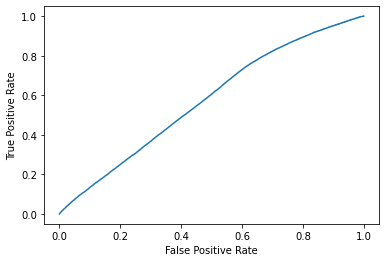

In [43]:
#define metrics
y_pred_probaMulti = model.predict_proba(X_test_scaled)[::,1]
print(y_pred_probaMulti)
y_testMulti = preprocessing.label_binarize(y_test, classes=[2,1,3,4])
print(y_testMulti)

#y_pred_proba2 = 
fprMulti, tprMulti, thresholdsMulti = metrics.roc_curve(y_testMulti.argmax(axis=1),  y_pred_probaMulti, pos_label=0)

#create ROC curve
plt.plot(fprMulti,tprMulti)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print("Area Under Roc Score : ",metrics.auc(fprMulti,tprMulti))
plt.show()

[0.92231197 0.92305115 0.9231834  ... 0.92246052 0.92270824 0.92317643]
[[0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 ...
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]]
Area Under Roc Score :  0.586579608430944


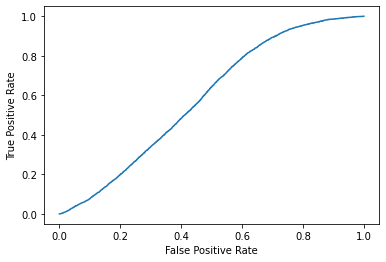

In [42]:
#define metrics
y_pred_probaMulti = model.predict_proba(X_test_scaled)[::,1]
print(y_pred_probaMulti)
y_testMulti = preprocessing.label_binarize(y_test, classes=[1, 2,3,4])
print(y_testMulti)

#y_pred_proba2 = 
fprMulti, tprMulti, thresholdsMulti = metrics.roc_curve(y_testMulti.argmax(axis=1),  y_pred_probaMulti, pos_label=0)

#create ROC curve
plt.plot(fprMulti,tprMulti)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print("Area Under Roc Score : ",metrics.auc(fprMulti,tprMulti))
plt.show()

[0.92231197 0.92305115 0.9231834  ... 0.92246052 0.92270824 0.92317643]
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
Area Under Roc Score :  0.5653843918063682


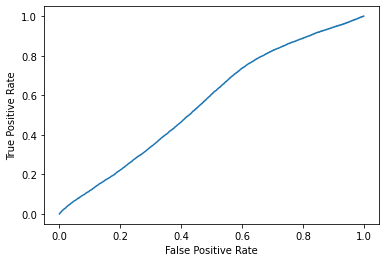

In [41]:
#define metrics
y_pred_probaMulti = model.predict_proba(X_test_scaled)[::,1]
print(y_pred_probaMulti)
y_testMulti = preprocessing.label_binarize(y_test, classes=[2, 3])
print(y_testMulti)

#y_pred_proba2 = 
fprMulti, tprMulti, thresholdsMulti = metrics.roc_curve(y_testMulti.argmax(axis=1),  y_pred_probaMulti, pos_label=0)

#create ROC curve
plt.plot(fprMulti,tprMulti)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print("Area Under Roc Score : ",metrics.auc(fprMulti,tprMulti))
plt.show()

# Gaussian NB

In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
model

y_pred = model.predict(X_test)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?|
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision Score : ",metrics.precision_score(y_test, y_pred,average='macro',zero_division=0))
print("Recall Score : ",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1 Score : ",metrics.f1_score(y_test, y_pred,average='macro'))
#f1 score, fpr

NameError: name 'X_train' is not defined

In [5]:
#define metrics
y_pred_probaGaus = model.predict_proba(X_test)[::,1]
print(y_pred_probaGaus)
y_testGaus = preprocessing.label_binarize(y_test, classes=[1, 2])
print(y_testGaus)

#y_pred_proba2 = 
fprGaus, tprGaus, thresholdsGaus = metrics.roc_curve(y_testGaus.argmax(axis=1),  y_pred_probaGaus, pos_label=0)

#create ROC curve
plt.plot(fprGaus,tprGaus)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print("Area Under Roc Score : ",metrics.auc(fprGaus,tprGaus))
plt.show()

NameError: name 'model' is not defined

[0.89555176 0.94084834 0.94084834 ... 0.93278727 0.91034251 0.94084834]
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
Area Under Roc Score :  0.5640720064538547


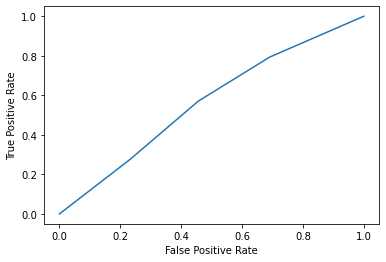

In [72]:
#define metrics
y_pred_probaGaus = model.predict_proba(X_test)[::,1]
print(y_pred_probaGaus)
y_testGaus = preprocessing.label_binarize(y_test, classes=[2, 3])
print(y_testGaus)

#y_pred_proba2 = 
fprGaus, tprGaus, thresholdsGaus = metrics.roc_curve(y_testGaus.argmax(axis=1),  y_pred_probaGaus, pos_label=0)

#create ROC curve
plt.plot(fprGaus,tprGaus)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print("Area Under Roc Score : ",metrics.auc(fprGaus,tprGaus))
plt.show()

# Complement NB

In [64]:
from sklearn.naive_bayes import ComplementNB
model = ComplementNB()
model.fit(X_train_scaled, y_train)
model

y_pred = model.predict(X_test_scaled)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision Score : ",metrics.precision_score(y_test, y_pred,average='macro',zero_division=0))
print("Recall Score : ",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1 Score : ",metrics.f1_score(y_test, y_pred,average='macro'))

[[     0   4882      0    282]
 [     0 358984      0  77129]
 [     0  11985      0   4070]
 [     0  10658      0   4738]]
Accuracy: 0.7694107393680932
Precision Score :  0.24593467537017727
Recall Score :  0.28272168274642484
F1 Score :  0.24150847832010314


[0.91034251 0.91034251 0.91034251 ... 0.91034251 0.91034251 0.91034251]
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
Area Under Roc Score :  0.5


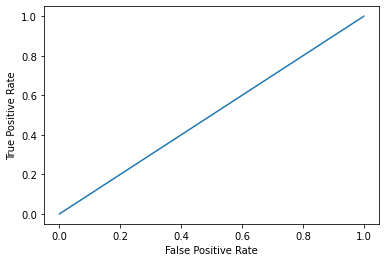

In [76]:
#define metrics
y_pred_probaComp = model.predict_proba(X_test_scaled)[::,1]
print(y_pred_probaComp)
y_testComp = preprocessing.label_binarize(y_test, classes=[2, 3])
print(y_testComp)

#y_pred_proba2 = 
fprComp, tprComp, thresholdsComp = metrics.roc_curve(y_testComp.argmax(axis=1),  y_pred_probaComp, pos_label=0)

#create ROC curve
plt.plot(fprComp,tprComp)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print("Area Under Roc Score : ",metrics.auc(fprComp,tprComp))
plt.show()

# Bernoulli NB

In [66]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)
model

y_pred = model.predict(X_test)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision Score : ",metrics.precision_score(y_test, y_pred,average='macro',zero_division=0))
print("Recall Score : ",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1 Score : ",metrics.f1_score(y_test, y_pred,average='macro'))

[[     0   5164      0      0]
 [     0 436113      0      0]
 [     0  16055      0      0]
 [     0  15396      0      0]]
Accuracy: 0.9225453114687516
Precision Score :  0.2306363278671879
Recall Score :  0.25
F1 Score :  0.2399281062364044


[0.89555176 0.94084834 0.94084834 ... 0.93278727 0.91034251 0.94084834]
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
Area Under Roc Score :  0.5640720064538547


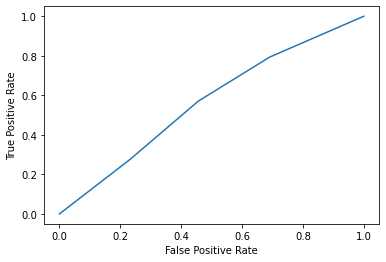

In [75]:
#define metrics
y_pred_probaBern = model.predict_proba(X_test)[::,1]
print(y_pred_probaBern)
y_testBern = preprocessing.label_binarize(y_test, classes=[2, 3])
print(y_testBern)

#y_pred_proba2 = 
fprBern, tprBern, thresholdsBern = metrics.roc_curve(y_testBern.argmax(axis=1),  y_pred_probaBern, pos_label=0)

#create ROC curve
plt.plot(fprBern,tprBern)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print("Area Under Roc Score : ",metrics.auc(fprBern,tprBern))
plt.show()

# Categorical NB 

In [59]:
from sklearn.naive_bayes import CategoricalNB

model = CategoricalNB()
model.fit(X_train_scaled, y_train)
model
#print(X_test)
y_pred = model.predict(X_test_scaled)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision Score : ",metrics.precision_score(y_test, y_pred,average='macro',zero_division=0))
print("Recall Score : ",metrics.recall_score(y_test, y_pred,average='macro'))

IndexError: index 1 is out of bounds for axis 1 with size 1

[0.9221001 0.9221001 0.9221001 ... 0.9221001 0.9221001 0.9221001]
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]


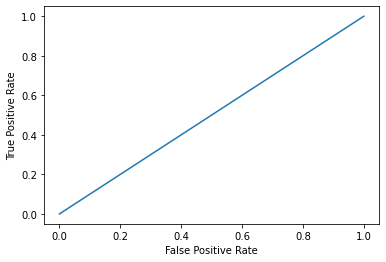

In [230]:
#define metrics
y_pred_probaCat = model.predict_proba(X_test_scaled)[::,1]
print(y_pred_probaCat)
y_testCat = preprocessing.label_binarize(y_test, classes=[2, 3])
print(y_testCat)

#y_pred_proba2 = 
fprCat, tprCat, thresholdsCat = metrics.roc_curve(y_testCat.argmax(axis=1),  y_pred_probaCat, pos_label=0)

#create ROC curve
plt.plot(fprCat,tprCat)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print("Area Under Roc Score : ",metrics.auc(fprCat,tprCat))
plt.show()

# Clustering

In [8]:
clusteredData = data.filter(['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)'])
clusteredData

clusteredData = clusteredData.dropna()
clusteredData = clusteredData.reset_index(drop = True)
clusteredData

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi)
0,3,36.1,42.1,58.0,10.4,3.230,29.76,10.0
1,3,29.8,37.0,93.0,10.4,0.500,29.69,10.0
2,2,29.2,35.6,100.0,8.1,1.427,29.66,10.0
3,2,30.0,33.1,92.0,3.5,0.521,29.63,0.5
4,2,31.8,39.0,70.0,11.5,0.491,29.59,10.0
...,...,...,...,...,...,...,...,...
2363634,2,86.0,86.0,40.0,13.0,0.543,28.92,10.0
2363635,2,70.0,70.0,73.0,6.0,0.338,29.39,10.0
2363636,2,73.0,73.0,64.0,10.0,0.561,29.74,10.0
2363637,2,71.0,71.0,81.0,8.0,0.772,29.62,10.0


In [9]:
clusteredData.columns

Index(['Severity', 'Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)',
       'Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)'],
      dtype='object')

In [10]:
from sklearn.preprocessing import StandardScaler
features = ['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)']
X = clusteredData.loc[:, features].values
Y = clusteredData.loc[:,['Severity']].values
X = StandardScaler().fit_transform(clusteredData)
X

array([[ 2.22138286, -1.11564661, -0.9942085 , ...,  1.64184932,
         0.33949754,  0.35784692],
       [ 2.22138286, -1.41359873, -1.26276198, ..., -0.12956221,
         0.27541369,  0.35784692],
       [-0.21693739, -1.44197512, -1.33648255, ...,  0.47193907,
         0.24794919,  0.35784692],
       ...,
       [-0.21693739,  0.62950149,  0.6329097 , ..., -0.08998122,
         0.32118787,  0.35784692],
       [-0.21693739,  0.53491352,  0.5275946 , ...,  0.04693007,
         0.21132985,  0.35784692],
       [-0.21693739,  0.91326541,  0.94885498, ..., -0.10555407,
        -0.69499884, -0.78205547]])

In [11]:
Y

array([[3],
       [3],
       [2],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-1.306075,1.537926
1,-2.127294,0.552767
2,-2.160760,-0.108196
3,-3.198490,-1.429813
4,-1.363346,0.612497
...,...,...
2363634,2.163400,0.763710
2363635,0.559631,-0.448473
2363636,0.972900,-0.157814
2363637,0.507107,-0.529263


In [13]:
#finalClustered = pd.concat([principalDf, clusteredData[['Severity']]], axis = 1)
#finalClustered

,principal component 1,principal component 2,Severity
0,-1.306075,1.537926,3
1,-2.127294,0.552767,3
2,-2.160760,-0.108196,2
3,-3.198490,-1.429813,2
4,-1.363346,0.612497,2
...,...,...,...
2363634,2.163400,0.763710,2
2363635,0.559631,-0.448473,2
2363636,0.972900,-0.157814,2
2363637,0.507107,-0.529263,2


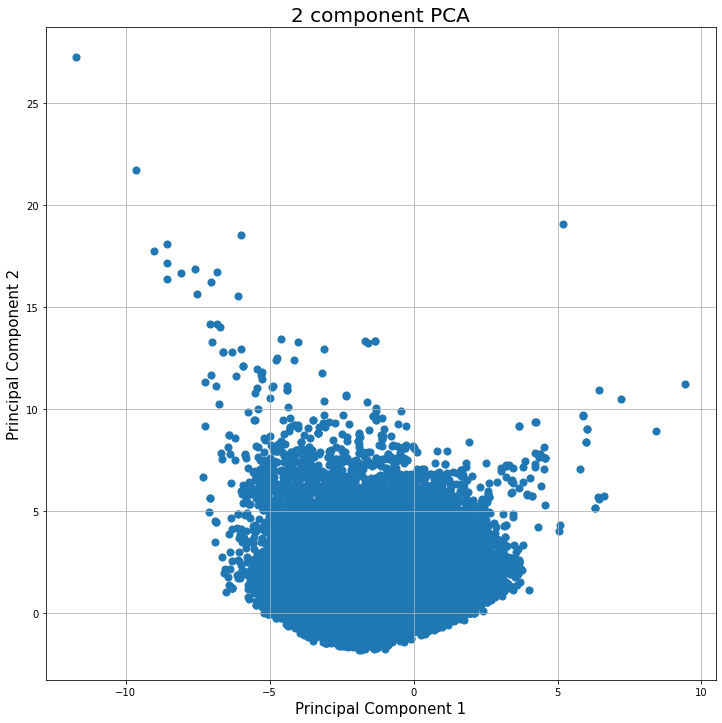

In [31]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,2,3,4]

#colors = ['r', 'g', 'b','y']
#for Severity, color in zip(targets,colors):
 #   indicesToKeep = principalDf['Severity'] == Severity
ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
, principalDf.loc[indicesToKeep, 'principal component 2']
, s = 50)
#ax.legend(targets)
ax.grid()

In [39]:
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred_kmeans = kmeans.fit_predict(principalDf)

In [40]:
y_pred_kmeans

array([3, 0, 0, ..., 1, 2, 1])

In [41]:
y_pred_kmeans is kmeans.labels_

True

In [42]:
kmeans.cluster_centers_

array([[-1.79800462, -0.63780324],
       [ 1.63499968,  0.36071467],
       [ 0.17012319, -0.53690781],
       [-1.64106581,  1.77312258]])

In [43]:
kmeans.labels_

array([3, 0, 0, ..., 1, 2, 1])

In [46]:
X_new = np.array([[1,3],[-10,2]])
kmeans.predict(X_new)

array([1, 3])

In [56]:
def plot_data(X):
    plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

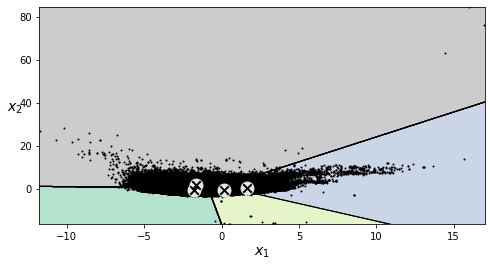

In [57]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, principalDf)
plt.show()

In [58]:
kmeans_iter1 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(principalDf)
kmeans_iter2.fit(principalDf)
kmeans_iter3.fit(principalDf)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=4, n_init=1,
       random_state=1)

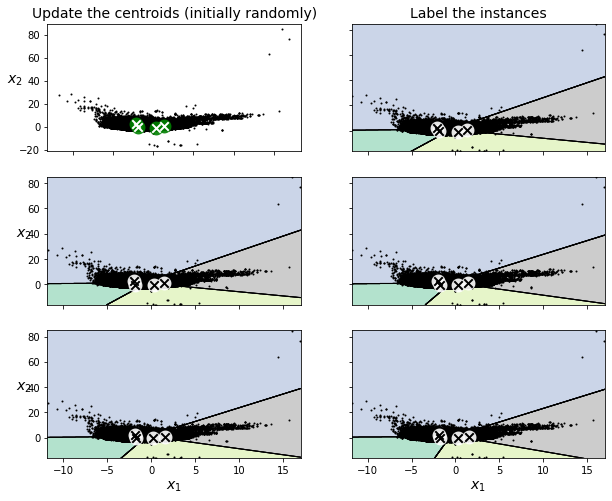

In [59]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(principalDf)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='g', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, principalDf, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, principalDf, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, principalDf, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, principalDf, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, principalDf, show_ylabels=False)

plt.show()

In [61]:
def plot_clusterer_comparison(clusterer1, clusterer2, principalDf, title1=None, title2=None):
    clusterer1.fit(principalDf)
    clusterer2.fit(principalDf)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, principalDf)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, principalDf, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

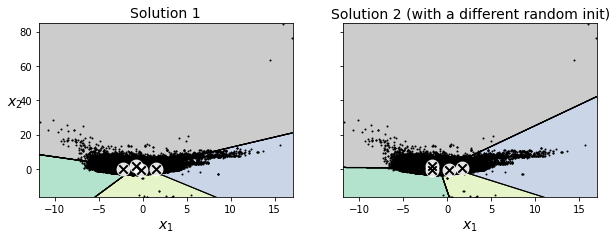

In [64]:
kmeans_rnd_init1 = KMeans(n_clusters=4, init="random", n_init=1,
                         algorithm="full", random_state=44)
kmeans_rnd_init2 = KMeans(n_clusters=4, init="random", n_init=1,
                         algorithm="full", random_state=70)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, principalDf,
                          "Solution 1", "Solution 2 (with a different random init)")
plt.show()

In [65]:
kmeans.inertia_

2905493.3664747747

In [66]:
principalDf_dist = kmeans.transform(principalDf)
np.sum(principalDf_dist[np.arange(len(principalDf_dist)), kmeans.labels_]**2)

2905493.3664747328

In [67]:
kmeans.score(principalDf)

-2905493.3664747747

In [68]:
kmeans_rnd_init1.inertia_

2920601.7501694057

In [69]:
kmeans_rnd_init2.inertia_

2905943.9597179294

In [77]:
kmeans_rnd_10_inits = KMeans(n_clusters=4, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(principalDf)

KMeans(algorithm='full', init='random', n_clusters=4, random_state=11)

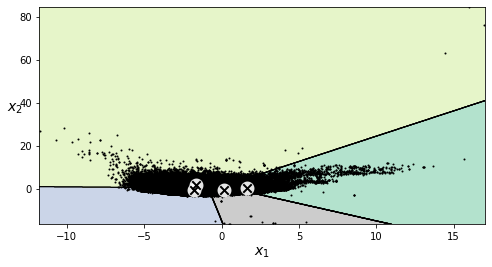

In [78]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, principalDf)
plt.show()

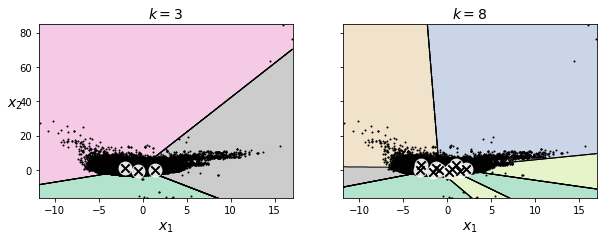

In [79]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=10, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, principalDf, "$k=3$", "$k=10$")
plt.show()

In [80]:
kmeans_k3.inertia_

3592656.8082500394

In [81]:
kmeans_k8.inertia_

1336085.866447692

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principalDf)
    distortions.append(kmeanModel.inertia_)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Decision treees

In [1]:
from sklearn.utils import resample

sev1 = df2[df2["Severity"] == 1]
sev2 = df2[df2["Severity"] == 2]
sev3 = df2[df2["Severity"] == 3]
sev4 = df2[df2["Severity"] == 4]
#df2_upsample = resample(spam_messages,
#             replace=True,
#             n_samples=len(ham_messages),
#             random_state=42)

print(sev1.shape)
print(sev2.shape)
print(sev3.shape)
print(sev4.shape)

NameError: name 'df2' is not defined

In [ ]:
sev2_downsample = resample(sev2,
             replace=True,
             n_samples=len(sev1),
             random_state=42)
sev3_downsample = resample(sev3,
             replace=True,
             n_samples=len(sev1),
             random_state=42)
sev4_downsample = resample(sev4,
             replace=True,
             n_samples=len(sev1),
             random_state=42)
# print(sev4_downsample.shape)
# print(sev2.shape)
# print(sev2_downsample)
# print(sev4_downsample)

# data_upsampled = pd.concat([, spam_upsample])
pdList = [sev1,sev2_downsample,sev3_downsample,sev4_downsample]
df2_downsampled = pd.concat(pdList)
df2_downsampled.groupby('Severity').size().plot(kind='pie',
                                       y = "Severity",
                                       label = "Type",
                                       autopct='%1.1f%%')

## Tree 1

In [ ]:
X = df2.iloc[:, 1:].values.round(decimals=0)
y = df2.iloc[:, 0].values

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [ ]:
var_train, var_test, res_train, res_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [ ]:
np.

In [ ]:
np.count_nonzero(res_test == 1)

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
decision_tree = decision_tree.fit(var_train, res_train)

In [ ]:
#using the macro average would be a good choice as it treats all classes equally.
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


res_pred = decision_tree.predict(var_test)
acc = accuracy_score(res_test, res_pred)
rec = recall_score(res_test, res_pred, average='macro')
pre = precision_score(res_test, res_pred, average='macro')
f1 = f1_score(res_test, res_pred, average='macro')

print(confusion_matrix(res_test, res_pred))
print("Accuracy:",acc)
print("Precision Score : ",pre)
print("Recall Score : ",rec)
print("F1 Score : ",f1)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
 
scores = []
dt = DecisionTreeClassifier(criterion='gini', max_depth = 2, \
                        min_samples_leaf = 0.10)
for train_index, test_index in kf.split(X):0
    #print("Train index: {0}, \nTest index: {1}".format(train_index, test_index))
var_train, var_test = X[train_index], X[test_index]
res_train, res_test = y[train_index], y[test_index]
 
dt.fit(var_train, res_train)
scores.append(dt.score(var_test, res_test))
print("\n" + ("*" * 100))
print("The cross-validation scores using custom method are \n{0}".format(scores))
print("*" * 100)
 
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using custom method is {0}".format(np.mean(scores)))
print("*" * 100)
print("\n")

In [ ]:
var_train, var_test, res_train, res_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
newSizeX = round(0.3 * res_train.size)
newSizey = round(0.3 * res_train.size)

newSizey
#newSizey

In [ ]:
#30% of previous train
X1 = var_train[0:newSizeX]
y1 = res_train[0:newSizey]

In [ ]:
var_train1, var_test1, res_train1, res_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

In [ ]:
decision_tree2 = DecisionTreeClassifier(max_depth=2, random_state=42)
decision_tree2 = decision_tree.fit(var_train1, res_train1)

In [ ]:
res_pred1 = decision_tree2.predict(var_test1)
acc = accuracy_score(res_test1, res_pred1)
rec = recall_score(res_test1, res_pred1, average='macro')
pre = precision_score(res_test1, res_pred1, average='macro')
f1 = f1_score(res_test1, res_pred1, average='macro')

print(confusion_matrix(res_test1, res_pred1))
print("Accuracy:",acc)
print("Precision Score : ",pre)
print("Recall Score : ",rec)
print("F1 Score : ",f1)

## Tree 3

In [ ]:
newX = round(0.6 * res_train.size)
newy = round(0.6 * res_train.size)

In [ ]:
X2 = var_train[0:newX]
y2 = res_train[0:newX]

In [ ]:
var_train2, var_test2, res_train2, res_test2 = train_test_split(X2, y2, test_size = 0.3)

In [ ]:
decision_tree3 = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree3 = decision_tree.fit(var_train2, res_train2)

In [ ]:
plot_tree(decision_tree3);

In [ ]:
res_pred2 = decision_tree3.predict(var_test2)
acc = accuracy_score(res_test2, res_pred2)
rec = recall_score(res_test2, res_pred2, average='macro')
pre = precision_score(res_test2, res_pred2, average='macro')
f1 = f1_score(res_test2, res_pred2, average='macro')

print("Accuracy:",acc)
print("Precision Score : ",pre)
print("Recall Score : ",rec)
print("F1 Score : ",f1)

In [ ]:
X7 = df2_downsampled.iloc[:, 1:].values.round(decimals=0)
y7 = df2_downsampled.iloc[:, 0].values

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X7, y7)

In [ ]:
plot_tree(tree_clf);

In [ ]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size = 0.2, random_state= 42)

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree = decision_tree.fit(X7_train, y7_train)

In [ ]:
y7_pred = decision_tree.predict(X7_test)
acc = accuracy_score(y7_test, y7_pred)
rec = recall_score(y7_test, y7_pred, average='macro')
pre = precision_score(y7_test, y7_pred, average='macro')
f1 = f1_score(y7_test, y7_pred, average='macro')

print(confusion_matrix(y7_test, y7_pred))
print("Accuracy:",acc)
print("Precision Score : ",pre)
print("Recall Score : ",rec)
print("F1 Score : ",f1)

In [ ]:
sev2_downsample = resample(sev2,
             replace=True,
             n_samples=len(sev1),
             random_state=42)
sev3_downsample = resample(sev3,
             replace=True,
             n_samples=len(sev1),
             random_state=42)
sev4_downsample = resample(sev4,
             replace=True,
             n_samples=len(sev1),
             random_state=42)
# print(sev4_downsample.shape)
# print(sev2.shape)
# print(sev2_downsample)
# print(sev4_downsample)

# data_upsampled = pd.concat([, spam_upsample])
pdList = [sev1,sev2_downsample,sev3_downsample,sev4_downsample]
df2_downsampled = pd.concat(pdList)
df2_downsampled.groupby('Severity').size().plot(kind='pie',
                                       y = "Severity",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [ ]:
df2_downsampled.Severity.value_counts()

In [ ]:
X = df2_downsampled.iloc[:, 1:].values.round(decimals=0)
y = df2_downsampled.iloc[:, 0].values

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show() # plotting the random generated data 

In [2]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y) #train linear regression on X and y
lin_reg.intercept_, lin_reg.coef_ # learning parameters

NameError: name 'X' is not defined

In [3]:
X_new = np.array([[0], [1], [2], [3], [4], [5], [6], [7]]) 
X_new_b = np.c_[np.ones((8, 1)), X_new]  # add x0 = 1 to each instance

NameError: name 'np' is not defined

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

NameError: name 'train_test_split' is not defined

In [5]:
model = LinearRegression()

In [6]:
model.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [7]:
predictions = model.predict(X_test)

NameError: name 'X_test' is not defined

In [8]:
X_test[0]

NameError: name 'X_test' is not defined

In [9]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

NameError: name 'mean_squared_error' is not defined

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y) #train linear regression on X and y
lin_reg.intercept_, lin_reg.coef_ # learning parameters 

NameError: name 'X' is not defined

## Linear Regression Gradient Descent

In [ ]:
m,n = X.shape

In [ ]:
mu = X.mean(0) 
sigma = X.std(0) # standard deviation: max(x)-min(x)
xn = (X - mu) / sigma

In [11]:
xo = np.hstack((np.ones((m, 1)), xn))

NameError: name 'np' is not defined

In [12]:
repeat = 1000
lrate = 0.1
theta = np.zeros((n+1))
def computeCost(X, y, theta):
  m = len(y) # number of training examples
  diff = np.matmul(X, theta) - y
  J = 1 / (2 * m) * np.matmul(diff, diff)
  return J

NameError: name 'np' is not defined

In [13]:
def gradientDescent(X, y, theta, alpha, num_iters):
  # Initialize some useful values
  m = len(y) # number of training examples
  J_history = []
  # repeat until convergance
  for i in range(num_iters):
    hc = np.matmul(X, theta) - y
    theta -= alpha / m * np.matmul(X.transpose(), hc)
    # Save the cost J in every iteration
    J_history.append(computeCost(X, y, theta))
  return theta, J_history

In [ ]:
theta, J_history = gradientDescent(xo, y, theta, lrate, repeat)
# Display gradient descent's result
print('Best theta computed from gradient descent: ')
print(f' {theta} ')

In [14]:
# Plot the convergence graph
plt.plot(np.arange(repeat), J_history, '-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

NameError: name 'plt' is not defined

In [15]:
y_pred = np.matmul(xo, theta)

NameError: name 'np' is not defined

In [16]:
from sklearn import metrics
# get RMSE error rate
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y, y_pred)))
# calculate our own accuracy where prediction within 10% is o
diff = (y_pred / y * 100)
print('Mean of results: ',diff.mean())
print('Deviation of results: ',diff.std())
print('Results within 10% support/resistance: ', len(np.where(np.logical_and(diff>=90, diff<=110))[0]) / m * 100)

NameError: name 'np' is not defined

In [17]:
plt.plot(np.arange(m), diff, '-b')
plt.xlabel('Number')
plt.ylabel('Accuracy %')
plt.show()

NameError: name 'plt' is not defined

## Logistic regression

In [18]:
testData1 = df2_downsampled.copy()

NameError: name 'df2_downsampled' is not defined

In [19]:
testData1['Severity'] = testData1['Severity'].replace([1],0)
testData1['Severity'] = testData1['Severity'].replace([3],0)
testData1['Severity'] = testData1['Severity'].replace([4],0)

NameError: name 'testData1' is not defined

In [20]:
testData1 = df2_downsampled.filter(['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Humidity(%)'])
#df2 = data.filter(['Severity','Distance(mi)','Visibility(mi)'])
testData1

NameError: name 'df2_downsampled' is not defined

In [21]:
testData1['Severity'] = testData1['Severity'].replace([1],0)
testData1['Severity'] = testData1['Severity'].replace([3],0)
testData1['Severity'] = testData1['Severity'].replace([4],0)

NameError: name 'testData1' is not defined

In [22]:
testData1 = testData1.dropna()
testData1 = testData1.reset_index(drop = True)
testData1

NameError: name 'testData1' is not defined

In [23]:
X = testData1.iloc[:, 1:]
y = testData1.iloc[:, 0].values
X

NameError: name 'testData1' is not defined

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

NameError: name 'X' is not defined

In [25]:
X_new = np.linspace(0, 130, 1000).reshape(-1, 8)
y_proba = log_reg.predict_proba(X_new) # estimated probability computed by the model, we use one feature (the petal width)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="2") # green curve plots estimated  Severity 2
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="0") # blue dotted line computes estimated probability of not Severity 2

NameError: name 'np' is not defined

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [27]:
print(classification_report(y_test, y_pred))

NameError: name 'y_test' is not defined

## Perceptron

In [28]:
testData1 = df2_downsampled.copy()
testData1['Severity'] = testData1['Severity'].replace([1],0)
testData1['Severity'] = testData1['Severity'].replace([2],1)
testData1['Severity'] = testData1['Severity'].replace([3],0)
testData1['Severity'] = testData1['Severity'].replace([4],0)

NameError: name 'testData1' is not defined

In [29]:
testData1 = df2_downsampled.filter(['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Humidity(%)'])
#df2 = data.filter(['Severity','Distance(mi)','Visibility(mi)'])
testData1

NameError: name 'df2_downsampled' is not defined

In [30]:
testData1['Severity'] = testData1['Severity'].replace([1],0)
testData1['Severity'] = testData1['Severity'].replace([2],1)
testData1['Severity'] = testData1['Severity'].replace([3],0)
testData1['Severity'] = testData1['Severity'].replace([4],0)

NameError: name 'testData1' is not defined

In [31]:
testData1 = testData1.dropna()
testData1 = testData1.reset_index(drop = True)
testData1

NameError: name 'testData1' is not defined

In [32]:
X = testData1.iloc[:, 1:]
y = testData1.iloc[:, 0]
y

NameError: name 'testData1' is not defined

In [33]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

NameError: name 'Perceptron' is not defined

In [34]:
y_pred = per_clf.predict([[10, 97]]) # make prediction for new instance 

NameError: name 'per_clf' is not defined

In [35]:
per_clf.score(X, y)

NameError: name 'per_clf' is not defined

In [36]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=10):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {
              "Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [37]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score

df_reviews = pd.read_excel("https://github.com/grahamharrison68/Public-Github/blob/master/Analyzing%20Customer%20Feedback/data/out/Womens%20Clothing%20E-Commerce%20Reviews%20with%20Emotions.xlsx?raw=true")
    
df_reviews.dropna(inplace=True) 
df_reviews.reset_index(drop=True, inplace=True)


model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy', verbose=10)

print(cv_results.mean(), cv_results.std())

NameError: name 'Perceptron' is not defined

In [38]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

NameError: name 'np' is not defined

In [39]:
import numpy as np
import copy as cp
import matplotlib.pyplot as plt

import seaborn as sns
from typing import Tuple
from sklearn.metrics import confusion_matrix

In [40]:
def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

In [41]:
actual_classes, predicted_classes, _ = cross_val_predict(model, kfold, X.to_numpy(), y.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])

NameError: name 'kfold' is not defined

In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [43]:
X = testData1.iloc[:, 1:]
y = testData1.iloc[:, 0]

NameError: name 'testData1' is not defined

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)

NameError: name 'X' is not defined

In [45]:
clf = MLPClassifier(hidden_layer_sizes= 50, activation = 'tanh', random_state=1, max_iter=300).fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [46]:
clf.predict_proba(X_test[:1])

NameError: name 'clf' is not defined

In [47]:
y_pred = clf.predict(X_test)

NameError: name 'clf' is not defined

In [48]:
clf.score(X_test, y_test)

NameError: name 'clf' is not defined

In [49]:
actual_classes, predicted_classes, _ = cross_val_predict(model, kfold, X.to_numpy(), y.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])

NameError: name 'kfold' is not defined

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [51]:
print(classification_report(y_test, y_pred))

NameError: name 'y_test' is not defined

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [53]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

NameError: name 'y_test' is not defined